In [46]:
# load imp packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [47]:
# load the data
df = pd.read_csv("data/heart-dataset.csv", header=0)
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [48]:
# lets change the case of the column names for better readability
df = df.rename(str.upper, axis="columns")
df.head()

,AGE,SEX,CP,RESTBP,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [49]:
# get the column names
column_names = list(df.columns)

# check out the data type
df.dtypes

AGE        float64
SEX        float64
CP         float64
RESTBP     float64
CHOL       float64
FBS        float64
RESTECG    float64
THALACH    float64
EXANG      float64
OLDPEAK    float64
SLOPE      float64
CA         float64
THAL       float64
NUM        float64
dtype: object

In [50]:
# convert some features to catagorical
categorical_features = ["SEX", "CP", "FBS", "RESTECG", "EXANG", "SLOPE", "CA", "THAL", "NUM"]

for x in categorical_features:
    df[x] = df[x].astype(np.int64)
    df[x] = df[x].astype("category")
df.head()

,AGE,SEX,CP,RESTBP,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,NUM
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [51]:
df.dtypes

AGE         float64
SEX        category
CP         category
RESTBP      float64
CHOL        float64
FBS        category
RESTECG    category
THALACH     float64
EXANG      category
OLDPEAK     float64
SLOPE      category
CA         category
THAL       category
NUM        category
dtype: object

In [52]:
df["HEART_DISEASE"] = df["NUM"].copy() # renaming the target variable
del df["NUM"]
df.head()

,AGE,SEX,CP,RESTBP,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,HEART_DISEASE
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [53]:
df.isnull().sum() # check for any null values

AGE              0
SEX              0
CP               0
RESTBP           0
CHOL             0
FBS              0
RESTECG          0
THALACH          0
EXANG            0
OLDPEAK          0
SLOPE            0
CA               0
THAL             0
HEART_DISEASE    0
dtype: int64

In [54]:
df["HEART_DISEASE"].unique() # get unique labels

[0, 2, 1, 3, 4]
Categories (5, int64): [0, 2, 1, 3, 4]

In [55]:
target_value = list()

# make the labels binary : heart disease : yes/no
for i, row in df.iterrows():
    if row["HEART_DISEASE"] == 0:
        target_value.append(0)
    else:
        target_value.append(1)

In [56]:
df["TARGET"] = target_value # map the new binary label
del df["HEART_DISEASE"] # remove the old mapping

df.head()

,AGE,SEX,CP,RESTBP,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,TARGET
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [57]:
# get the continuous and categorical features
features = list(df.columns)

continuous_feature = [x for x in features if df[x].dtype == "float64"]
print(continuous_feature)

categorical_feature = [x for x in features if df[x].dtype != "float64"]
print(categorical_feature)

['AGE', 'RESTBP', 'CHOL', 'THALACH', 'OLDPEAK']
['SEX', 'CP', 'FBS', 'RESTECG', 'EXANG', 'SLOPE', 'CA', 'THAL', 'TARGET']


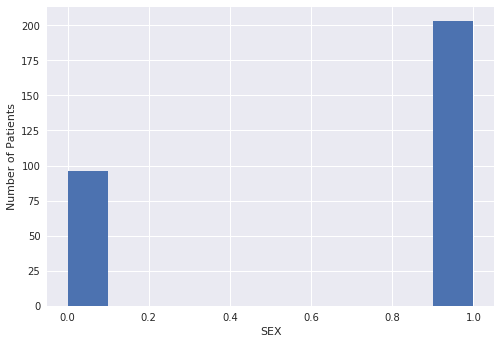

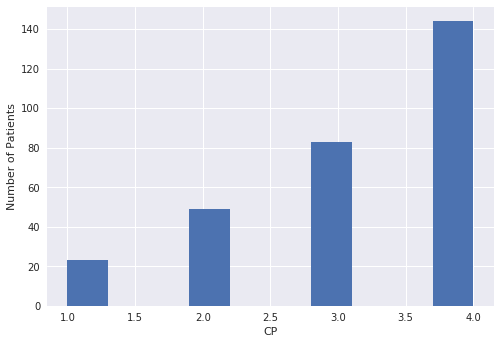

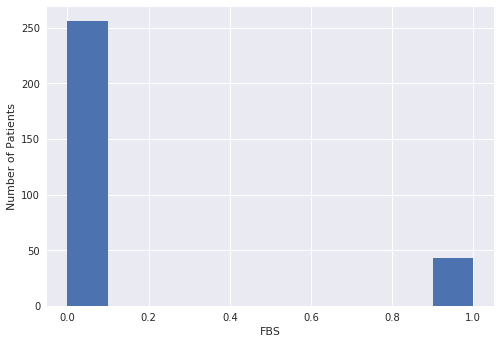

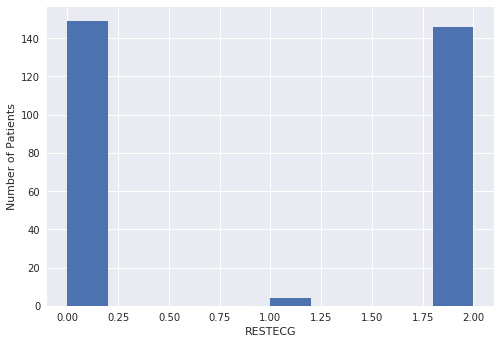

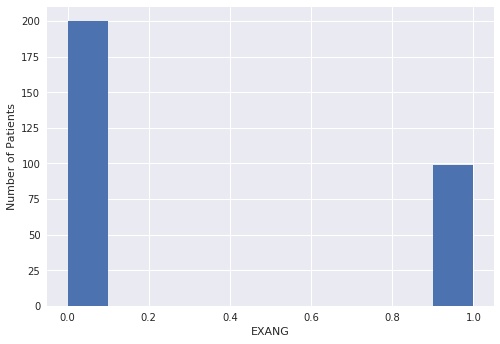

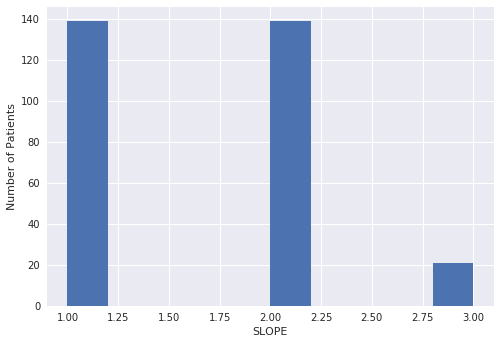

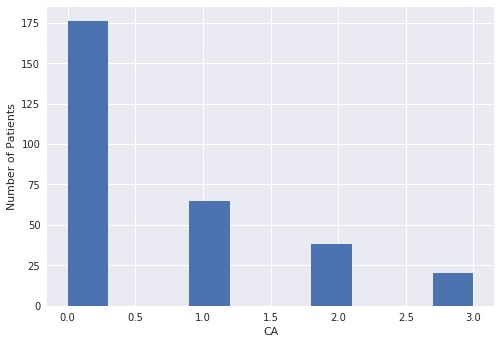

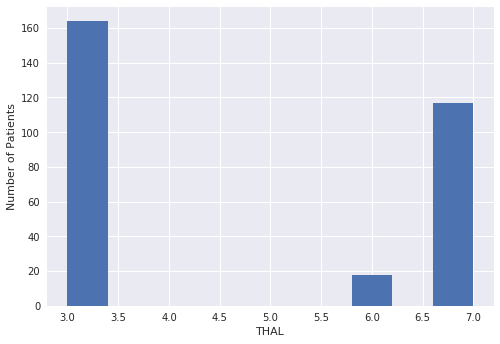

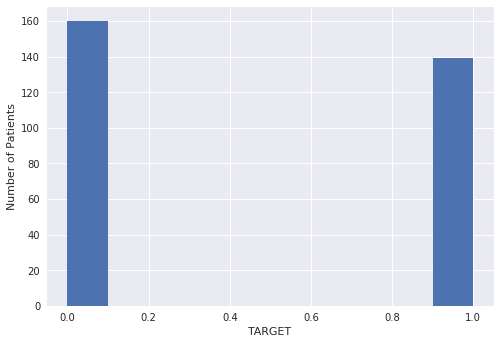

In [58]:
# plot the frequency distribution of each categorical features

for x in categorical_feature:
    plt.figure()
    plt.hist(df[x])
    plt.xlabel(x)
    plt.ylabel("Number of Patients")
    path = "data/graphs/" + x
    plt.savefig(path)

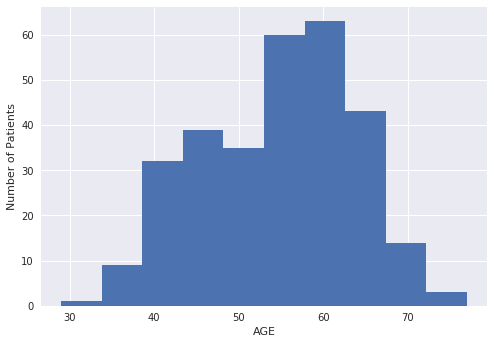

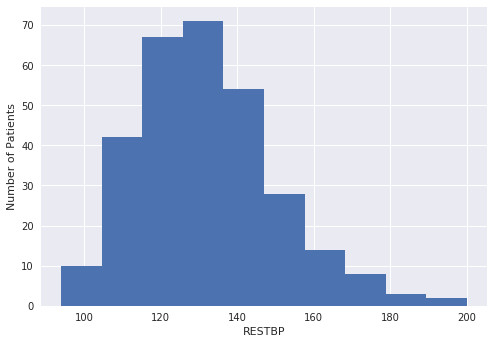

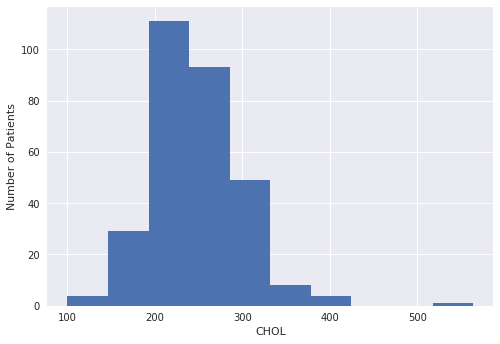

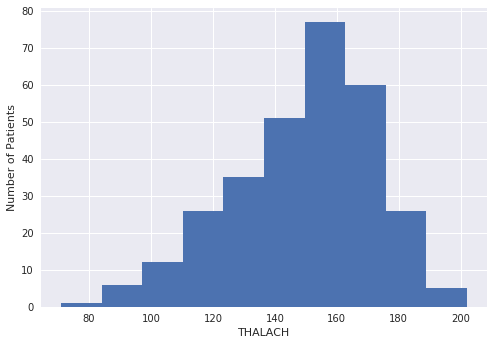

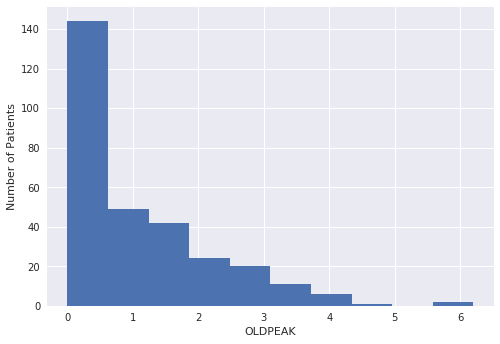

In [59]:
# plot the frequency distribution of each continuous features

for x in continuous_feature:
    plt.figure()
    plt.hist(df[x])
    plt.xlabel(x)
    plt.ylabel("Number of Patients")
    path = "data/graphs/" + x
    plt.savefig(path)

In [60]:
df.head()

,AGE,SEX,CP,RESTBP,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,TARGET
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [61]:
# load packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [62]:
# set feature and target for rfe
featureX = df.iloc[:, 0:-1]
targetY = df.iloc[:, -1]

In [63]:
# initiate a model
model = DecisionTreeClassifier()

In [64]:
# perform recursive feature elimination
rfe = RFE(model, n_features_to_select=12)

In [65]:
rfe

RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
  n_features_to_select=12, step=1, verbose=0)

In [66]:
fitted_model = rfe.fit(featureX, targetY) # fit the model and find the optimum features

In [67]:
fitted_model.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [68]:
df.columns

Index(['AGE', 'SEX', 'CP', 'RESTBP', 'CHOL', 'FBS', 'RESTECG', 'THALACH',
       'EXANG', 'OLDPEAK', 'SLOPE', 'CA', 'THAL', 'TARGET'],
      dtype='object')

In [69]:
features = list(df.columns)
selected_features = list()

for i in range(len(fitted_model.support_)):
    if fitted_model.support_[i] == True:
        selected_features.append(features[i])
selected_features

['AGE',
 'SEX',
 'CP',
 'RESTBP',
 'CHOL',
 'RESTECG',
 'THALACH',
 'EXANG',
 'OLDPEAK',
 'SLOPE',
 'CA',
 'THAL']

In [70]:
# set feature and target dataframe
X = df[selected_features]
y = df.iloc[:, -1]

# split the dataset into 70:30 train to test ratio for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
# train the model
clf = model.fit(X_train, y_train)

# predict the output
predicted_y = clf.predict(X_test)

In [72]:
accuracy = accuracy_score(predicted_y, y_test)
accuracy

0.7555555555555555

In [73]:
x_list = [5, 7, 10, 11, 12, 13]
y_list = list()

for num in range(10):
    for f in x_list:
        # set feature and target for rfe
        featureX = df.iloc[:, 0:-1]
        targetY = df.iloc[:, -1]

        # initiate a model
        model = DecisionTreeClassifier()

        # perform recursive feature elimination
        rfe = RFE(model, n_features_to_select=f)

        features = list(df.columns)
        selected_features = list()

        for i in range(len(fitted_model.support_)):
            if fitted_model.support_[i] == True:
                selected_features.append(features[i])

        # set feature and target dataframe
        X = df[selected_features]
        y = df.iloc[:, -1]

        # split the dataset into 70:30 train to test ratio for modeling
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2017)

        # train the model
        clf = model.fit(X_train, y_train)

        # predict the output
        predicted_y = clf.predict(X_test)
        y_list.append(accuracy_score(predicted_y, y_test))

In [74]:
x_list

[5, 7, 10, 11, 12, 13]

In [75]:
y_list

[0.6444444444444445,
 0.6666666666666666,
 0.6555555555555556,
 0.7,
 0.6777777777777778,
 0.6444444444444445,
 0.7,
 0.6555555555555556,
 0.7,
 0.6777777777777778,
 0.6333333333333333,
 0.6666666666666666,
 0.7111111111111111,
 0.7,
 0.6666666666666666,
 0.6555555555555556,
 0.7,
 0.6555555555555556,
 0.6666666666666666,
 0.6666666666666666,
 0.6444444444444445,
 0.6555555555555556,
 0.6555555555555556,
 0.6555555555555556,
 0.6444444444444445,
 0.6888888888888889,
 0.6555555555555556,
 0.6888888888888889,
 0.6333333333333333,
 0.6444444444444445,
 0.6444444444444445,
 0.7,
 0.6777777777777778,
 0.6555555555555556,
 0.6777777777777778,
 0.6444444444444445,
 0.6888888888888889,
 0.6888888888888889,
 0.6777777777777778,
 0.6777777777777778,
 0.6888888888888889,
 0.6333333333333333,
 0.6888888888888889,
 0.6555555555555556,
 0.7,
 0.6333333333333333,
 0.6666666666666666,
 0.7111111111111111,
 0.7222222222222222,
 0.6888888888888889,
 0.6888888888888889,
 0.6333333333333333,
 0.6333333333

In [76]:
max(y_list)

0.7333333333333333

In [77]:
min(y_list)

0.6333333333333333

In [78]:
len(x_list)

6

In [79]:
len(y_list)

60

In [80]:
x_list = x_list * 10

In [81]:
len(x_list)

60

Text(0.5,1,'Accuracy VS #Features')

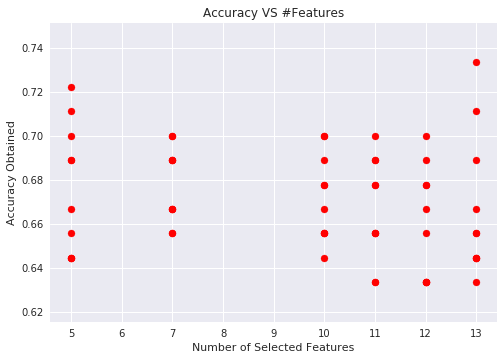

In [82]:
plt.figure()
plt.scatter(x_list, y_list, color="red")
plt.xlabel("Number of Selected Features")
plt.ylabel("Accuracy Obtained")
plt.title("Accuracy VS #Features")

In [83]:
df.head()

,AGE,SEX,CP,RESTBP,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,TARGET
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


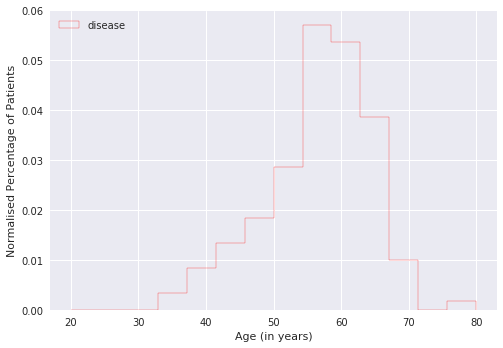

In [106]:
plt.figure()

bins = np.linspace(20,80,15)
plt.hist(df[df.TARGET>0].AGE.tolist(),bins,color=["red"],histtype="step",label="disease",normed=True)
plt.xlabel("Age (in years)")
plt.ylabel("Normalised Percentage of Patients")
plt.legend(prop={'size': 10},loc="upper left")
plt.show()

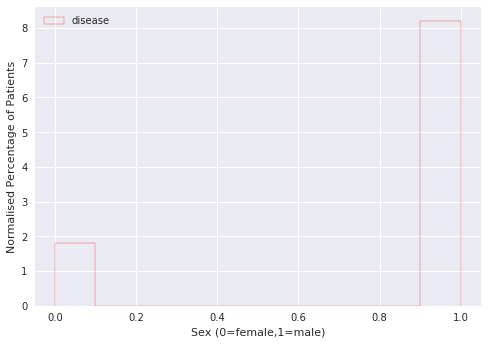

In [105]:
plt.figure()

plt.hist(df[df.TARGET>0].SEX.tolist(),color=["red"],histtype="step",label="disease",normed=True)
plt.xlabel("Sex (0=female,1=male)")
plt.ylabel("Normalised Percentage of Patients")
plt.legend(prop={'size': 10},loc="upper left")
plt.show()

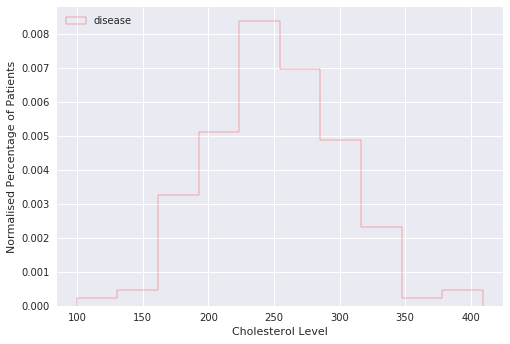

In [103]:
plt.figure()

plt.hist(df[df.TARGET>0].CHOL.tolist(),color=["red"],histtype="step",label="disease",normed=True)
plt.xlabel("Cholesterol Level")
plt.ylabel("Normalised Percentage of Patients")
plt.legend(prop={'size': 10},loc="upper left")
plt.show()